<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>PCA - Breast Cancer Dataset</b></p>

**Steps to Apply PCA**

1. **Scale the data:**
   - Features may have different units and scales (e.g., temperature in "°C", wind speed in "km/h").
   - **Standardization** transforms each feature to have a mean of zero and a standard deviation of one.
   - This step is necessary for PCA to correctly analyze the variance among the features.

2. **Compute the Covariance Matrix:**
   - Used to determine the strength and direction of relationships between features.
   - High values in the covariance matrix indicate a strong relationship between the corresponding features.

3. **Compute Eigenvalues and Eigenvectors:**
   - Derived from the covariance matrix.
   - **Eigenvalues:** Represent the ability of each principal component to explain the variance in the data.
   - **Eigenvectors:** Define the direction of the principal components.

4. **Select the principal components:**
   - Sort eigenvalues in descending order.
   - **Variance Threshold (80%-90%):** Check the cumulative variance explained by the first few principal components.
   - Typically, selecting components that explain over 80% or 90% of the variance is considered sufficient.

5. **Transform the data into new components:**
   - The original data is projected onto the selected principal components to create a new dataset.
   - This step is performed for dimensionality reduction and information condensation.

---

**Important Notes on Using PCA**

1. **Suitability for Explaining Results:**
   - If you need to explain the individual contribution of each feature to a target audience or stakeholder (e.g., identifying how much each feature contributes), PCA is **not a suitable method**.
   - This is because PCA represents the influence of original features indirectly through components, making direct interpretation difficult.

2. **Situations Requiring Overall Assessment:**
   - If the output or decision is more important than the contribution of individual features, PCA is suitable.
   - For example, in weather forecasting, the final prediction is important, not the individual effects of temperature, humidity, wind speed, and pressure.

3. **Example Scenarios:**
   - **PCA Not Suitable:** When customer segmentation requires explaining individual features (e.g., income level, age, purchase frequency), PCA is not appropriate.
   - **PCA Suitable:** In weather forecasting, if the focus is on the combined prediction from various meteorological variables rather than their individual effects, PCA can be used.

---

PCA is an effective tool for dimensionality reduction and variance condensation. However, its applicability depends on the nature of the final output:
- **If feature-level interpretation is required:** PCA is not recommended.
- **If the overall assessment or outcome is important:** PCA can be applied.

# <font color='orange'> <b>EDA</b><font color='black'>  

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.datasets import load_breast_cancer    # importing the breast cancer dataset from sklearn library
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [13]:
# import sklearn.datasets as datasets
# [x for x in dir(datasets) if x.startswith(('load_', 'fetch_'))]

# from sklearn.datasets import *
# dir(sklearn.datasets)

In [14]:
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X.shape   # There are 30 features

(569, 30)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [18]:
# Counting 0-1 values as a target variable

pd.DataFrame(cancer.target).value_counts()   

0
1    357
0    212
Name: count, dtype: int64

In [19]:
# swapped the 0-1s because we are focusing on the cancerous data class, so let's make the cancerous ones 1.

y = pd.Series(cancer.target).map({0:1, 1:0})  
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [20]:
# took 1 as the target variable, there are 212 cancer diagnoses
y.value_counts()

0    357
1    212
Name: count, dtype: int64

In [21]:
a = pd.concat([X,y], axis=1)  # added the y value at the end
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [22]:
a.groupby(0).mean()  # Let's look at the average of the parts with 0 and 1 using groupby

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# <font color='orange'> <b>Scaling Data</b><font color='black'>  

**Why is Scaling Important in PCA?**

1. **PCA Focuses on Variance:**  
   - PCA aims to **capture variance** in the data.  
   - Features with different scales can cause those with larger values to dominate and overshadow others.  

2. **Standardization is Recommended:**  
   - Standardization transforms features by making their **mean zero** and dividing by their **standard deviation**.  
   - This ensures PCA evaluates variance accurately.  
   - Min-Max scaling is not recommended as it does not preserve variance.  

3. **Without Scaling:**  
   - Features on different scales can distort PCA components, leading to misleading results.  

  
- When applying PCA, **StandardScaler** should be used to achieve more accurate and balanced results.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
# scaling

scaled_X = scaler.fit_transform(X)

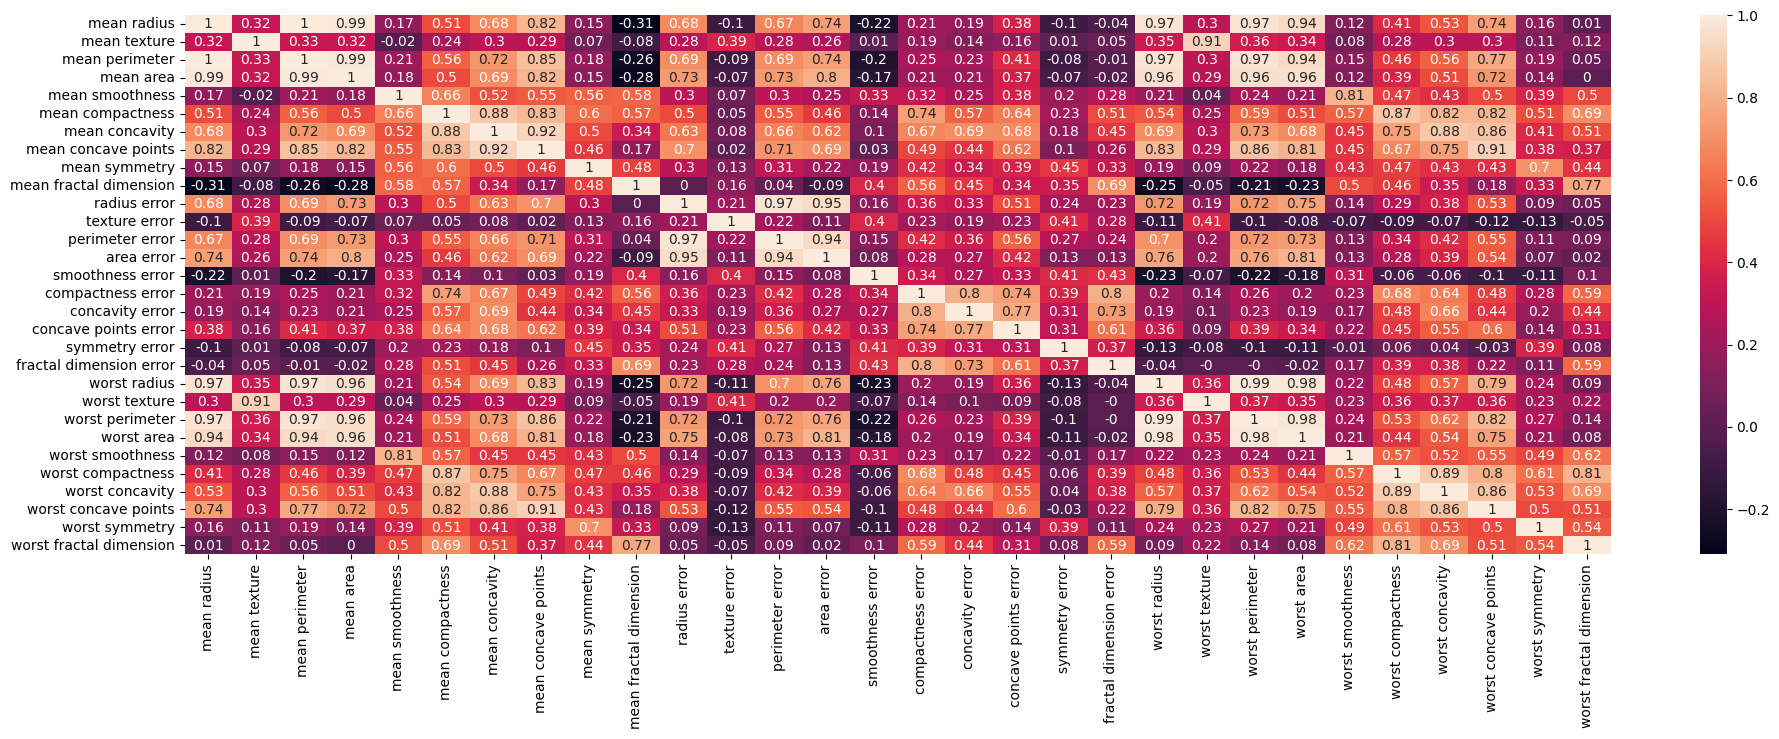

In [29]:
df_scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

plt.figure(figsize = (23, 7))

sns.heatmap(df_scaled_X.corr().round(2), annot = True);

**Selecting *n_components* in PCA**

The **n_components** parameter determines how many principal components will be created in PCA. Key considerations for selecting this parameter include:

---

**Valid Values for n_components:**
- **Number of Features and Observations:** **n_components** can be at most the **minimum value (number of features or observations)** in the dataset.  
  Examples:
  - 30 features, 100 observations → Maximum **30** components.
  - 100 features, 30 observations → Maximum **30** components.

---

**Factors to Consider When Choosing n_components:**

1. **Explained Variance Ratio:**
   - Each component explains a portion of the total variance in the dataset.
   - Typically, you aim for an explained variance ratio of around 90%-95%.  
     For example, if **n_components=10** explains 95% of the total variance, this is acceptable.

2. **Model Performance:**
   - To optimize the performance of the machine learning model applied after PCA, you can experiment with different **n_components** values.
   - Evaluate the model using metrics such as accuracy or precision.

3. **Visualization:**
   - For visualization purposes, **2 or 3 components** are often sufficient. This allows the data to be represented in two or three dimensions easily.

4. **Computational Cost:**
   - Selecting fewer components reduces computational time and resource usage.
   - When working with large datasets, lower **n_components** can help reduce computational costs.

5. **Scree Plot Analysis:**
   - Use a **scree plot** to visualize the variance contribution of each PCA component.
   - Identify the **elbow point**, where the variance gain decreases significantly, and select the number of components accordingly.

6. **Domain Knowledge:**
   - In some cases, domain expertise can help determine the meaningful number of components.  
     For instance, practical or theoretical insights may suggest a specific number of components.

---

Selecting **n_components** in PCA is critical to capturing variance while simplifying data processing.  
- **If high variance is the goal:** Choose the number of components that explain 90%-95% of the variance.  
- **For visualization purposes:** 2 or 3 components are typically sufficient.  
- **Using Scree Plot Analysis:** Select the number of components at the elbow point.

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)   # 2 components selected

In [34]:
principal_components = pca.fit_transform(scaled_X)   # Converted 30 features into 2 components

In [35]:
principal_components

# reduced 30 features to 2 components in 2 columns

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [36]:
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component"])
component_df

# Let's see the effect of components. we converted the above to DF
# The value that is high in the first component is low in the second and vice versa

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


# <font color='orange'> <b>Eigenvalues & Eigenvectors</b><font color='black'>  

In [38]:
# There are two aspects working behind PCA: EV and EVec

#Eigenvectors: eigenvalue vectors for each 2 components

pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [39]:
eigenvectors_first_component = pca.components_[0]  # They represent the direction of the maximum variance in all features in the first component.
eigenvectors_first_component

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [40]:
# let's see the contribution of each feature in the first component

first_eigenvectors = pd.DataFrame(eigenvectors_first_component, index=X.columns, 
                                  columns=["first_eigenvectors"]).sort_values("first_eigenvectors", ascending=False)

first_eigenvectors

,first_eigenvectors
mean concave points,0.260854
mean concavity,0.258400
worst concave points,0.250886
mean compactness,0.239285
worst perimeter,0.236640
worst concavity,0.228768
worst radius,0.227997
mean perimeter,0.227537
worst area,0.224871
mean area,0.220995


In [41]:
# Doing the same operations for the 2nd component

eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [42]:
# let's see the contribution of each feature in the second component

second_eigenvectors = pd.DataFrame(eigenvectors_second_component, index=X.columns, 
                                   columns=["second_eigenvectors"]).sort_values("second_eigenvectors", ascending=False)

second_eigenvectors

,second_eigenvectors
mean fractal dimension,0.366575
fractal dimension error,0.280092
worst fractal dimension,0.275339
compactness error,0.232716
smoothness error,0.204430
concavity error,0.197207
mean symmetry,0.190349
mean smoothness,0.186113
symmetry error,0.183848
worst smoothness,0.172304


In [43]:
# merge contributions into one table

pd.concat([first_eigenvectors, second_eigenvectors], axis=1)

,first_eigenvectors,second_eigenvectors
mean concave points,0.260854,-0.034768
mean concavity,0.258400,0.060165
worst concave points,0.250886,-0.008257
mean compactness,0.239285,0.151892
worst perimeter,0.236640,-0.199878
worst concavity,0.228768,0.097964
worst radius,0.227997,-0.219866
mean perimeter,0.227537,-0.215181
worst area,0.224871,-0.219352
mean area,0.220995,-0.231077


In [44]:
df_scaled_X.loc[0]

mean radius                1.097064
mean texture              -2.073335
mean perimeter             1.269934
mean area                  0.984375
mean smoothness            1.568466
mean compactness           3.283515
mean concavity             2.652874
mean concave points        2.532475
mean symmetry              2.217515
mean fractal dimension     2.255747
radius error               2.489734
texture error             -0.565265
perimeter error            2.833031
area error                 2.487578
smoothness error          -0.214002
compactness error          1.316862
concavity error            0.724026
concave points error       0.660820
symmetry error             1.148757
fractal dimension error    0.907083
worst radius               1.886690
worst texture             -1.359293
worst perimeter            2.303601
worst area                 2.001237
worst smoothness           1.307686
worst compactness          2.616665
worst concavity            2.109526
worst concave points       2

In [45]:
# multiply the above values ​​by the vector and get the sum

(df_scaled_X.loc[0] * eigenvectors_first_component).sum()

9.192836826213235

In [46]:
# ensures the 2nd component on the same line of the above value
(df_scaled_X.loc[0] * eigenvectors_second_component).sum()

1.9485830707786167

In [47]:
# first table with the above values

component_df.head()

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [48]:
# Let's look at the explained variance, its contributions to the 1st and 2nd components.
pca.explained_variance_ #Eigenvalues

array([13.30499079,  5.7013746 ])

# <font color='orange'> <b>Correlation Between Components</b><font color='black'>  

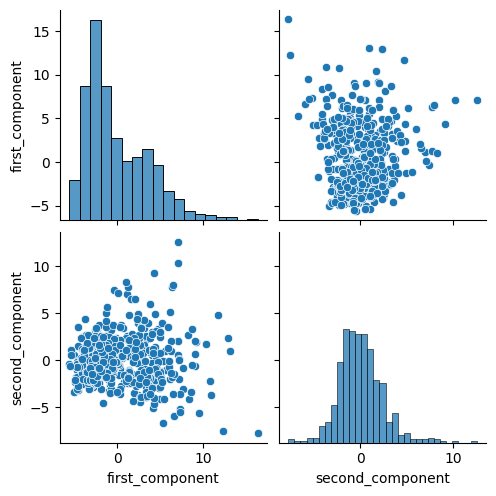

In [50]:
sns.pairplot(component_df);

In [51]:
component_df.corr().round()

# Since these two components are perpendicular to each other due to the structure of PCA, the correlation will be 0

,first_component,second_component
first_component,1.0,-0.0
second_component,-0.0,1.0


# <font color='orange'> <b>Finding Optimal Number of Components</b><font color='black'>  

In [53]:
pca.explained_variance_ratio_    

array([0.44272026, 0.18971182])

In [54]:
pca.explained_variance_ratio_.cumsum()   # cumulative rate
                                         # 2nd value is the sum of both

array([0.44272026, 0.63243208])

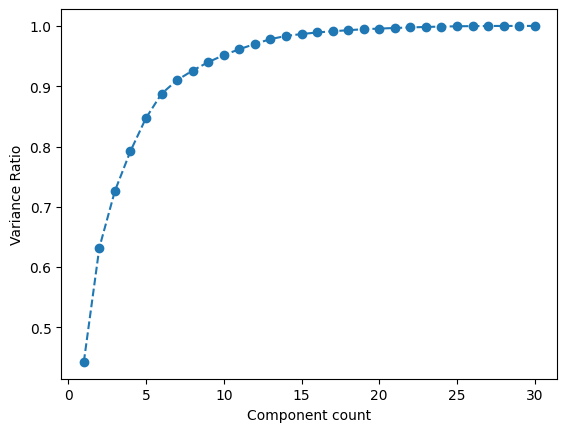

In [55]:
# let's cumulatively see how the variance ratio changes as each component is added

pca = PCA().fit(scaled_X)
x = range(1 , 31)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),"--o")
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [56]:
pca = PCA(n_components=30).fit(scaled_X)   # created 30 components

In [57]:
my_dict = {"explained_variance":pca.explained_variance_, 
        "explained_variance_ratio":pca.explained_variance_ratio_,
        "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

# created a dict to see the values ​in the table

In [58]:
df_ev = pd.DataFrame(my_dict, index = range(1,31))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,13.304991,0.442720,0.442720
2,5.701375,0.189712,0.632432
3,2.822910,0.093932,0.726364
4,1.984128,0.066021,0.792385
5,1.651633,0.054958,0.847343
6,1.209482,0.040245,0.887588
7,0.676409,0.022507,0.910095
8,0.477456,0.015887,0.925983
9,0.417629,0.013896,0.939879
10,0.351311,0.011690,0.951569


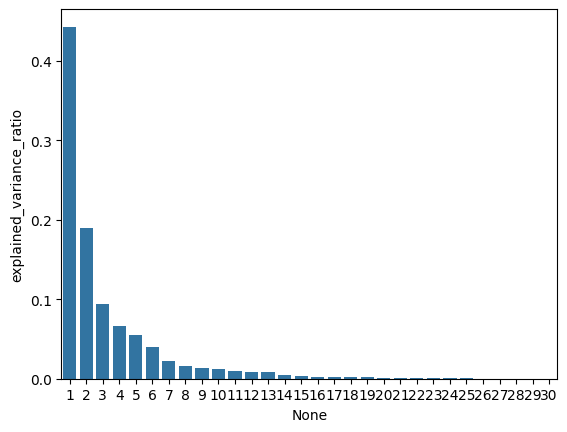

In [59]:
# let's see the above values ​​in the chart
sns.barplot(x = df_ev.index, y= df_ev.explained_variance_ratio);

In [60]:
# continued with 2 components here in order to obtain more concentrated information.
pca = PCA(n_components=2)

In [61]:
# repeat the operations we did at the above

principal_components = pca.fit_transform(scaled_X)
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [62]:
# let's see them side by side in the same table
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component"])
component_df

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


# <font color='orange'> <b>Interpreting PCA Results</b><font color='black'>  

In [64]:
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [65]:
# getting relevant data

combined_df = pd.concat([component_df, scaled_df], axis =1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
first_component,1.000000e+00,-3.204742e-17,0.797767,0.378013,0.829236,0.805393,0.519653,0.872050,0.941713,0.950654,...,0.830910,0.380727,0.862408,0.819517,0.466310,0.765672,0.833719,0.914327,0.447913,0.480273
second_component,-3.204742e-17,1.000000e+00,-0.557903,-0.142438,-0.513349,-0.551270,0.444002,0.362361,0.143534,-0.082943,...,-0.524526,-0.108469,-0.476841,-0.523298,0.411059,0.342564,0.233709,-0.019699,0.338485,0.656865
mean radius,7.977668e-01,-5.579027e-01,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,3.780132e-01,-1.424382e-01,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,8.292355e-01,-5.133487e-01,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019


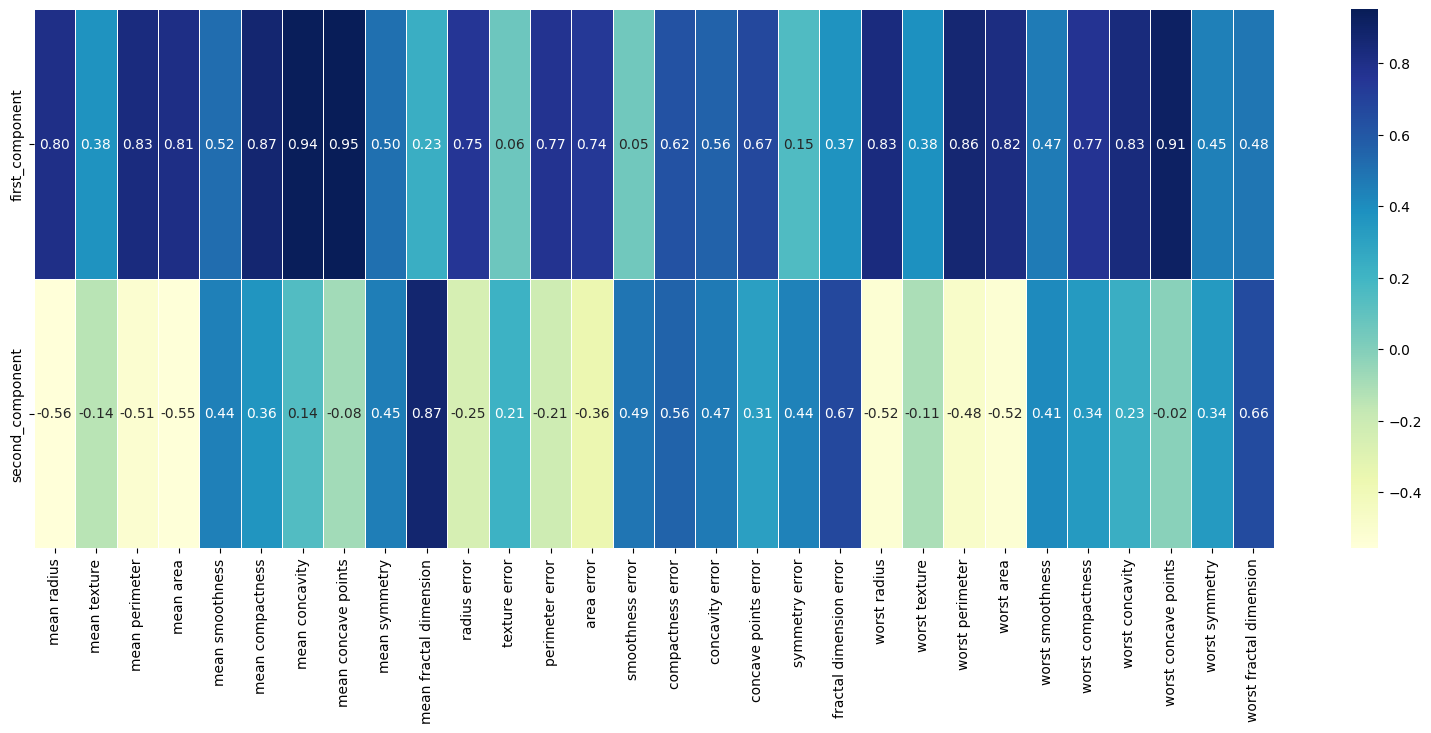

In [66]:
# let's look at their correlation with each other
# In the code below, we ensure that the heatmap is taken only from firs_component and second_component, and from the column starting with mean_radius on the right side.

fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

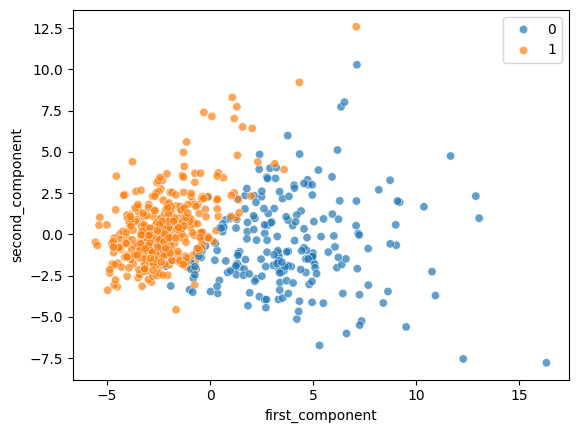

In [67]:
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=cancer.target, alpha=0.7);

# <font color='orange'> <b>K-Means Algorithm Application</b><font color='black'>  

In [69]:
# inertia calculation

from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(component_df)
    ssd.append(model.inertia_)

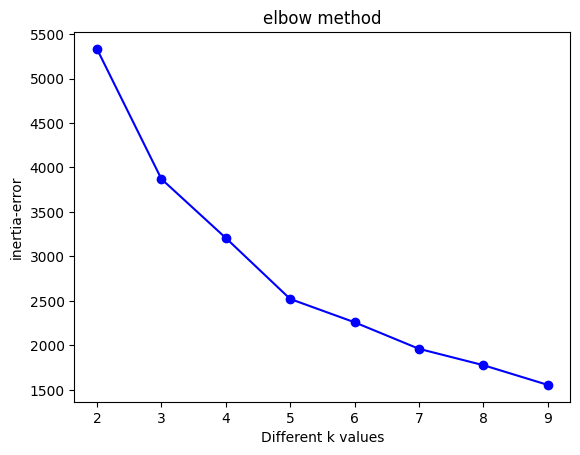

In [70]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")
plt.show()

# looking for a sharp decline in the chart below.
# will repeat the intermediate operations we did before below.

In [71]:
ssd

[5332.555574203129,
 3871.148055938509,
 3207.6431633823545,
 2521.908959686799,
 2259.7149092826394,
 1961.4447228647778,
 1777.4690499930487,
 1555.832925802105]

In [72]:
pd.Series(ssd).diff()

0            NaN
1   -1461.407518
2    -663.504893
3    -685.734204
4    -262.194050
5    -298.270186
6    -183.975673
7    -221.636124
dtype: float64

In [73]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1461.407518
3,663.504893
4,685.734204
5,262.194050
6,298.270186
7,183.975673
8,221.636124


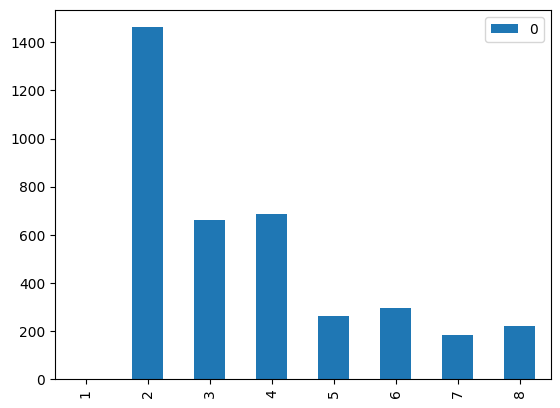

In [74]:
df_diff.plot(kind='bar');  
# There is a relatively steeper drop to 3, 3 seems good.

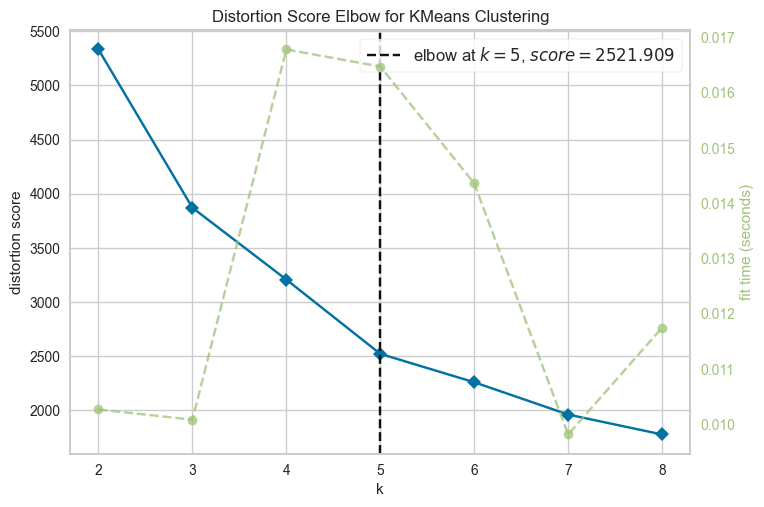

In [75]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(component_df)        # Fit the data to the visualizer
visualizer.show();

In [76]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5084690190672024
For n_clusters=3, the silhouette score is 0.4910071765416258
For n_clusters=4, the silhouette score is 0.34826268929857046
For n_clusters=5, the silhouette score is 0.3584513628253008
For n_clusters=6, the silhouette score is 0.3143718464464615
For n_clusters=7, the silhouette score is 0.3187121063364377
For n_clusters=8, the silhouette score is 0.33817673617746175


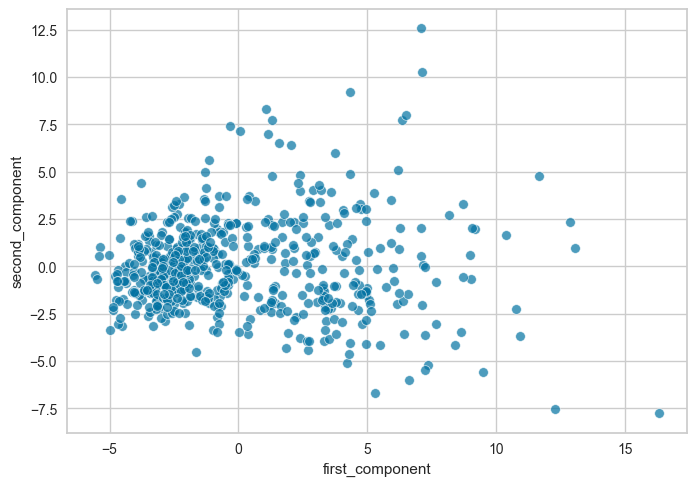

In [77]:
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, alpha=0.7);

In [78]:
model = KMeans(n_clusters =2, random_state=42)
clusters = model.fit_predict(component_df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [79]:
ct = pd.crosstab(y, clusters)
ct

# 53 errors appear in total

col_0,0,1
row_0,,
0,16,341
1,175,37


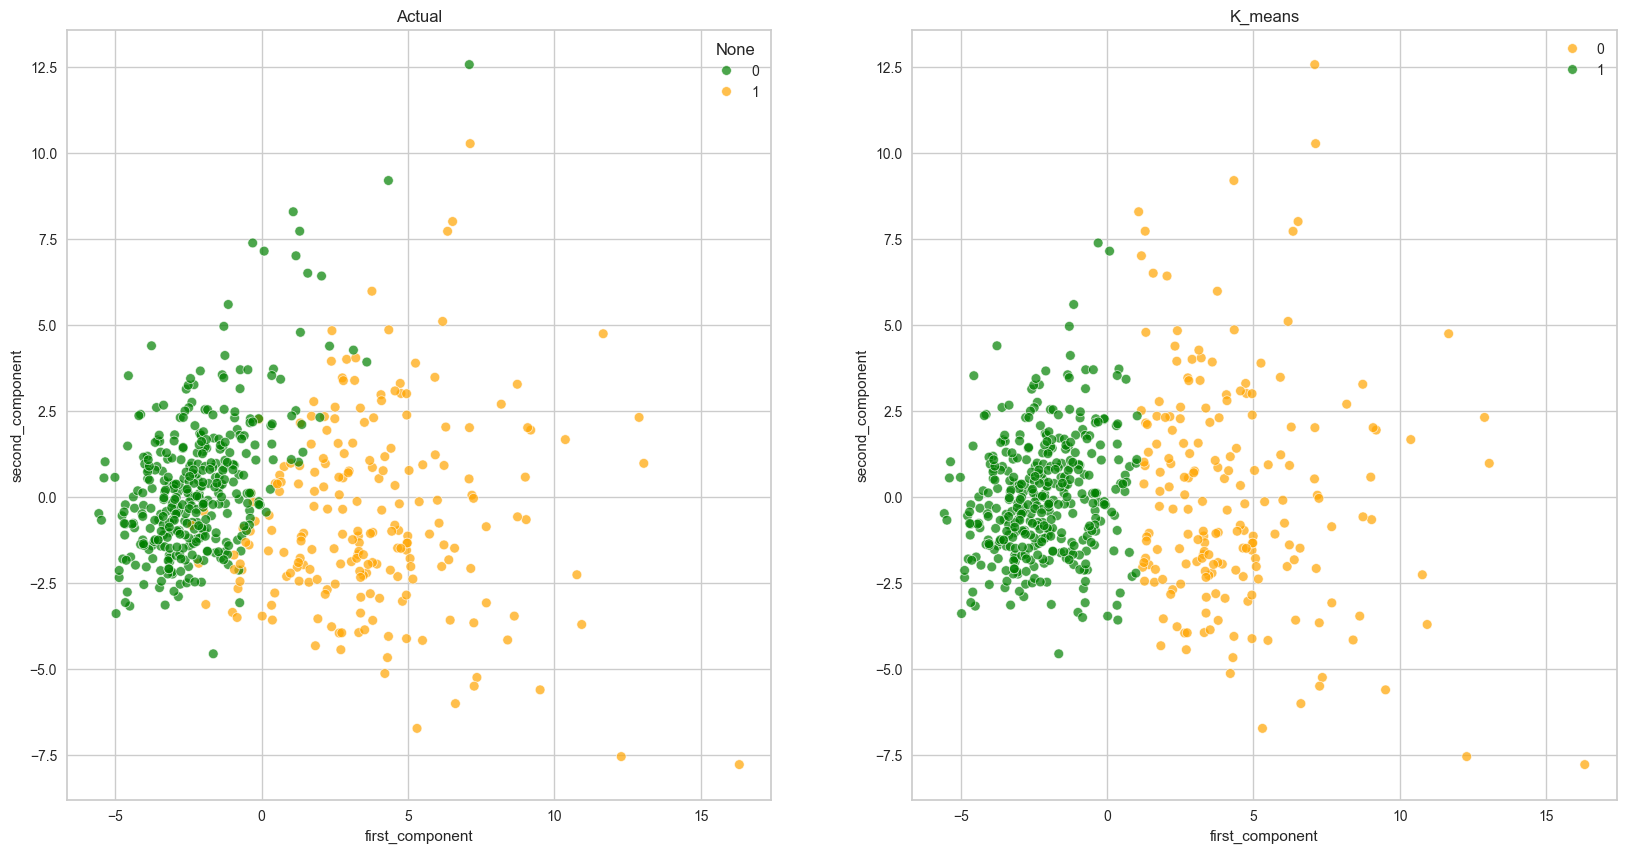

In [80]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=y, alpha=0.7,
                palette=['green','orange'])
plt.title("Actual")

plt.subplot(122)
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=clusters, alpha=0.7,
               palette=['orange','green'])
plt.title("K_means");

<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>